# Demo Notebook 1

This notebook adapts content from the pygsp documentation and examples as well as the NTDS 2019 course.

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from pygsp import graphs, filters
from scipy.io import loadmat

## First basic example : Regular grid graph

In [2]:
G = graphs.Grid2d()
G_small = graphs.Grid2d(N1=5)


# A basic Delta signal on graph
DELTA = 100
x = np.zeros(G.N)
x[DELTA] = 1

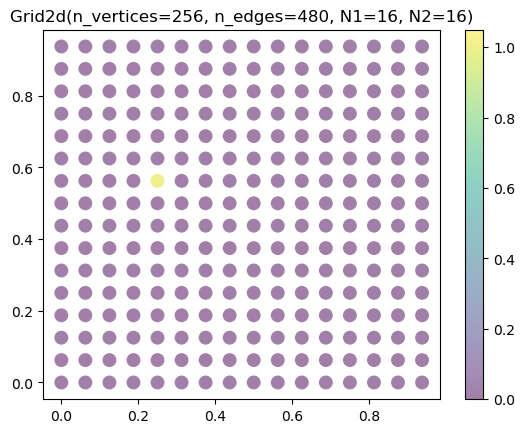

In [3]:
G.plot(x, edges=False);

## Computing the Graph Laplacian 

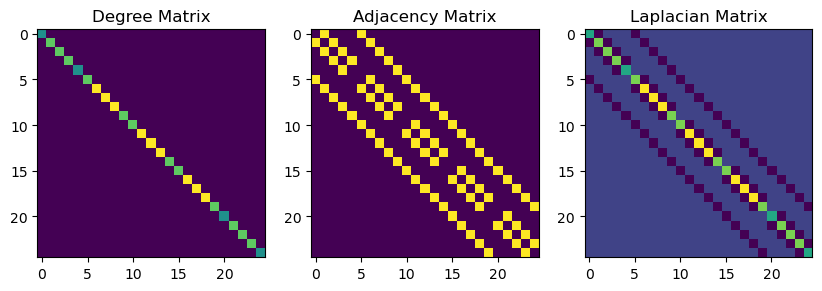

In [4]:
G.compute_laplacian('normalized')
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(np.diag(G_small.d))
plt.title("Degree Matrix")
plt.subplot(132)
plt.imshow(G_small.A.todense())
plt.title("Adjacency Matrix")
plt.subplot(133)
plt.imshow(G_small.L.todense())
plt.title("Laplacian Matrix");

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Grid2d(n_vertices=256, n_edges=480, N1=16, N2=16)'}>)

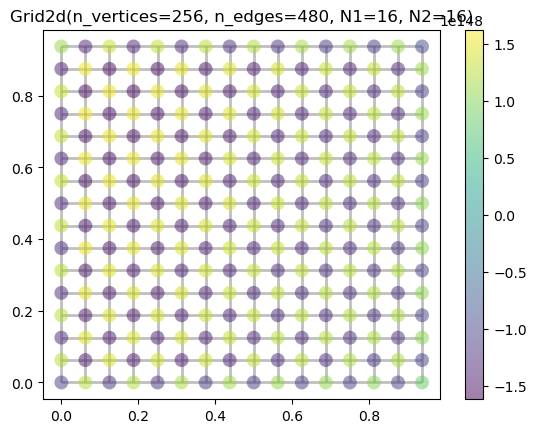

In [5]:
G.plot(np.linalg.matrix_power(G.L.toarray(),500)@x)

## Computing the Eigendecomposition of the Laplacian, i.e. the Fourier Basis of our graph

In [6]:
G.compute_fourier_basis()

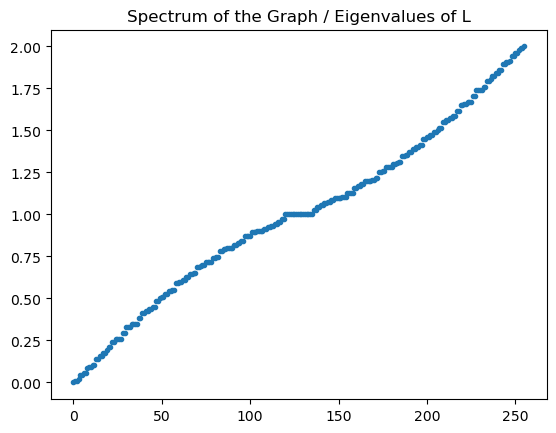

In [7]:
plt.plot(G.e,'.')
plt.title("Spectrum of the Graph / Eigenvalues of L");

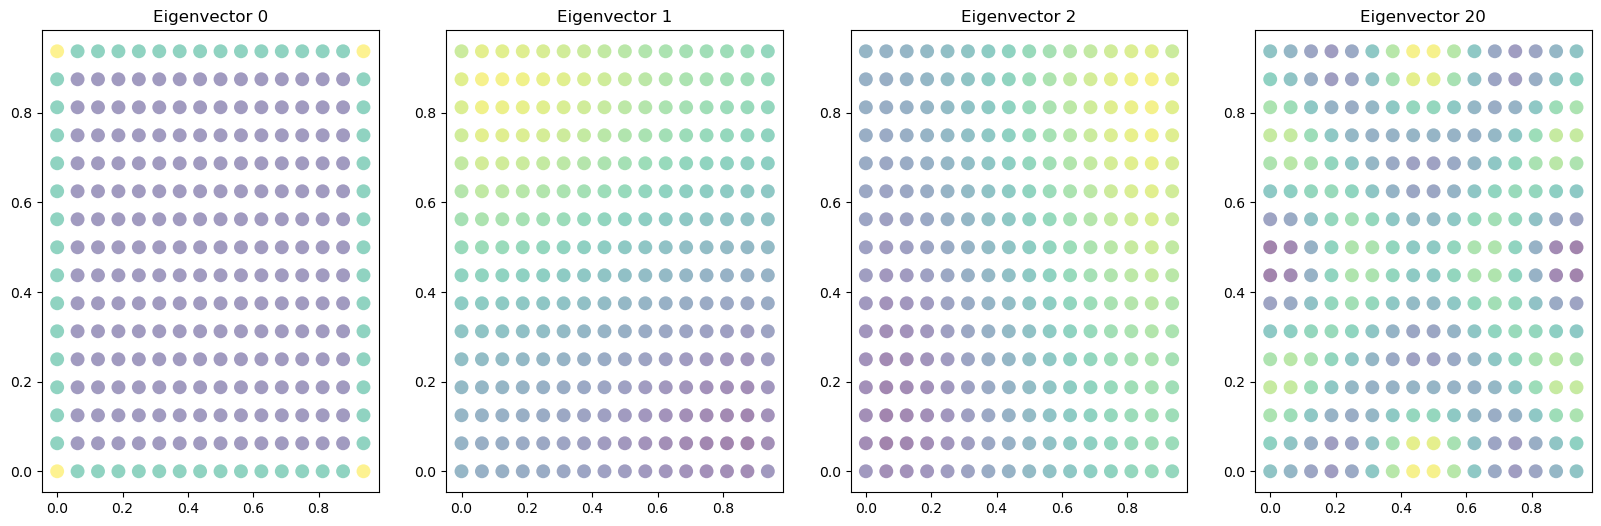

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

G.plot(G.U[:, 0],edges=False, colorbar=False, title="Eigenvector 0", ax=axes[0])
G.plot(G.U[:, 1],edges=False, colorbar=False, title="Eigenvector 1", ax=axes[1])
G.plot(G.U[:, 2],edges=False, colorbar=False, title="Eigenvector 2", ax=axes[2])
G.plot(G.U[:, 20],edges=False, colorbar=False, title="Eigenvector 20", ax=axes[3]);

## Fourier Transform of Signal


Need one/multiple example signals with low/high frequencies

In [9]:
scs = loadmat("/Users/hugofluhr/DATA/CHUV/connectomes/Individual_Connectomes.mat")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hugofluhr/DATA/CHUV/connectomes/Individual_Connectomes.mat'

Need coordinates to plot brains

In [ ]:
sc = scs.get('connMatrices')[0][0][1][0][0][...,1]

In [ ]:
sc.shape

In [ ]:
plt.matshow(sc)